#### En clasificación supervisada, entrenamos un modelo para que aprenda a predecir una etiqueta (clase) a partir de un conjunto de datos donde ya conocemos las respuestas correctas.

## 1.Cargando el dataset

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

columnas = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
df = pd.read_csv("../data/iris_train.csv", header=None, names=columnas)
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,5.1,3.3,1.7,0.5,Iris-setosa
2,5.4,3.9,1.3,0.4,Iris-setosa
3,5.6,3.0,4.5,1.5,Iris-versicolor
4,4.8,3.0,1.4,0.1,Iris-setosa


### Estadística descriptiva

In [16]:
#Para ver estadísticas
df.describe()

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm
count,120.000000,120.000000,120.000000,120.000000
mean,5.809167,3.040833,3.734167,1.188333
std,0.825232,0.441445,1.753723,0.749810
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.300000,3.300000,5.025000,1.800000
max,7.900000,4.400000,6.700000,2.500000


In [17]:
#Para ver información de los tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepalLengthCm  120 non-null    float64
 1   sepalWidthCm   120 non-null    float64
 2   petalLengthCm  120 non-null    float64
 3   petalWidthCm   120 non-null    float64
 4   Species        120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.8+ KB


In [15]:
#Para ver el número de muestras de cada clase
df['Species'].value_counts()

Species
Iris-versicolor    41
Iris-setosa        40
Iris-virginica     39
Name: count, dtype: int64

In [14]:
# Calcular la matriz de correlación
corr_matrix = df.corr()
# Crear un mapa de correlación
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Mapa de correlación de características')
plt.show()

ValueError: could not convert string to float: 'Iris-setosa'

## 2. Preprocesamiento de Datos

In [18]:
#Verificar los valores nulos
df.isnull().sum()

sepalLengthCm    0
sepalWidthCm     0
petalLengthCm    0
petalWidthCm     0
Species          0
dtype: int64

# 3.Exploración de Datos (EDA - Exploratory Data Analysis)

<Axes: >

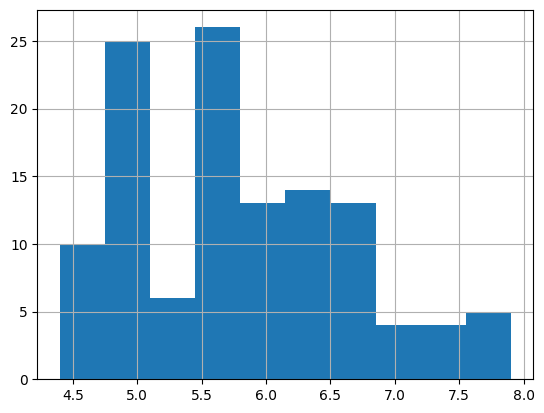

In [20]:
#Histogramas
df['sepalLengthCm'].hist()


<Axes: >

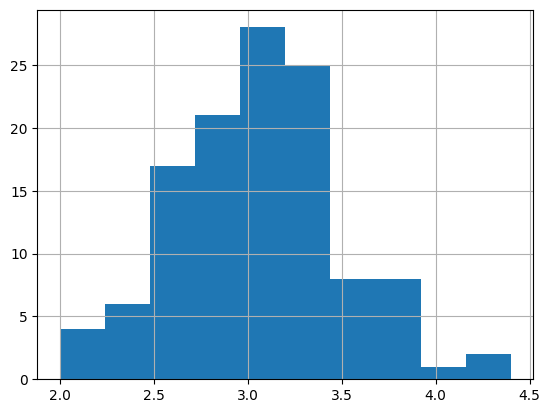

In [21]:
df['sepalWidthCm'].hist()


<Axes: >

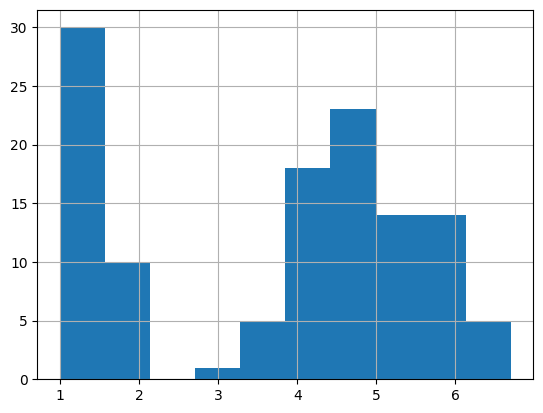

In [22]:
df['petalLengthCm'].hist()

<Axes: >

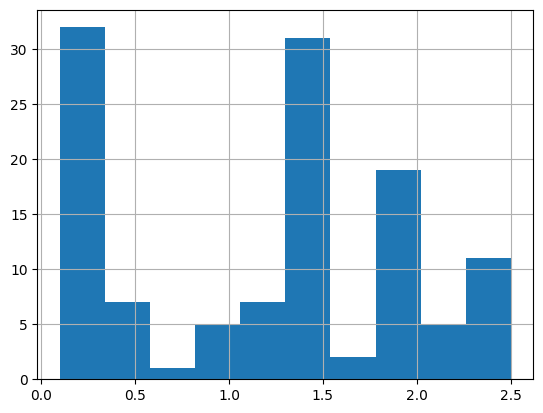

In [23]:
df['petalWidthCm'].hist()


In [28]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

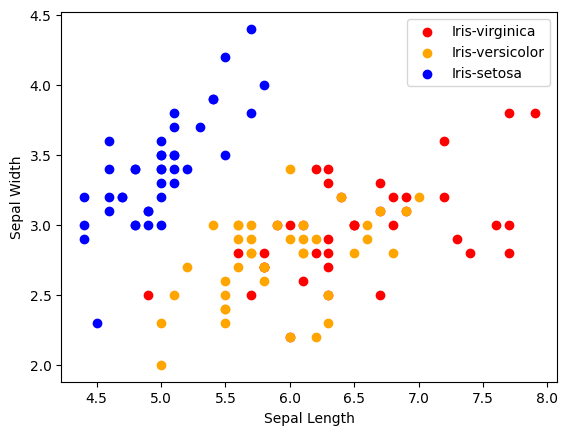

In [31]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

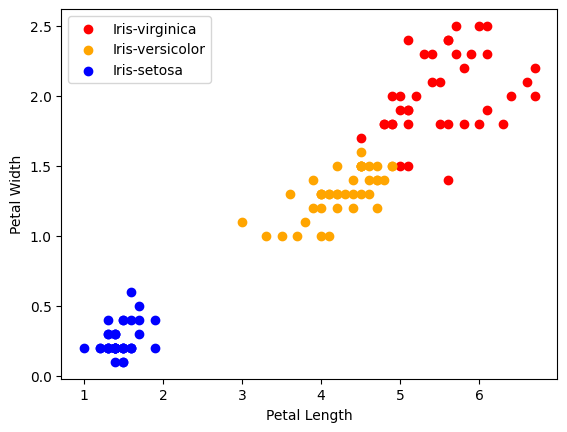

In [32]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

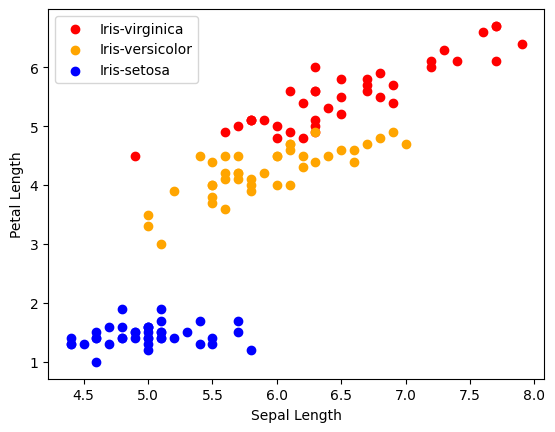

In [33]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

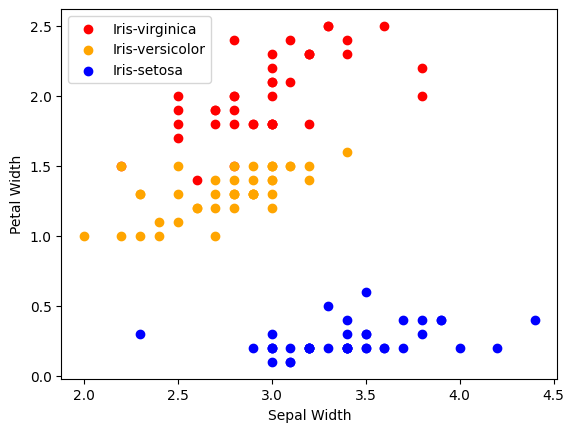

In [34]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

##### Crear scatter plots (diagramas de dispersión) es una técnica común en el análisis exploratorio de datos (EDA) para visualizar la relación entre dos variables numéricas. Estos gráficos son útiles para identificar patrones, correlaciones y posibles relaciones entre variables, así como para detectar valores atípicos y distribuciones.

#### ¿Por qué usar estos scatter plots?
1. Identificar relaciones: Estos gráficos te ayudan a identificar cómo se relacionan las características entre sí. Si ves que dos características están altamente correlacionadas, puedes usar esa información para crear modelos más eficientes.
2. Detectar agrupamientos: Los scatter plots pueden mostrarte visualmente cómo se agrupan los datos. Por ejemplo, si estás analizando diferentes especies de iris, podrías ver si hay una separación clara entre los diferentes grupos en algunos de estos gráficos.
3. Encontrar valores atípicos: Es fácil detectar valores atípicos con scatter plots. Si ves puntos que están lejos de la mayoría de los datos, esos podrían ser valores atípicos que necesitan un tratamiento especial.
4. Preparación para modelos predictivos: Estos gráficos te pueden ayudar a decidir qué características usar como variables de entrada para tu modelo de aprendizaje automático. Las características que muestran relaciones claras pueden ser las mejores candidatas para usarse en un modelo de clasificación.

### Matriz de correlación

In [38]:
corr_matrix = df.drop(columns=['Species']).corr()
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.066779,0.863269,0.802800
SepalWidthCm,-0.066779,1.000000,-0.391065,-0.320466
PetalLengthCm,0.863269,-0.391065,1.000000,0.960682
PetalWidthCm,0.802800,-0.320466,0.960682,1.000000


<Axes: >

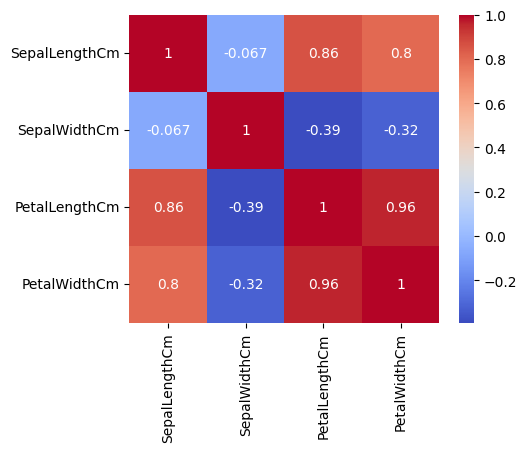

In [40]:
corr = corr_matrix
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

### Label encoder

El Label Encoder es una herramienta utilizada en el procesamiento de datos para convertir variables categóricas en valores numéricos. Esto es especialmente importante en la preparación de datos para modelos de aprendizaje automático, ya que muchos algoritmos de machine learning requieren que las entradas sean numéricas para poder procesarlas.

In [50]:
from sklearn.preprocessing import LabelEncoder

#Se crea una instancia de LabelEncoder
le = LabelEncoder()

# Ajusta el encoder a la columna 'Species' y transforma sus valores categóricos en valores numéricos
df['Species'] = le.fit_transform(df['Species'])

df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,5.1,3.3,1.7,0.5,0
2,5.4,3.9,1.3,0.4,0
3,5.6,3.0,4.5,1.5,1
4,4.8,3.0,1.4,0.1,0
5,5.0,3.5,1.6,0.6,0
6,4.9,2.5,4.5,1.7,2
7,6.9,3.1,4.9,1.5,1
8,5.2,3.4,1.4,0.2,0
9,5.4,3.9,1.7,0.4,0


# 4. Entrenamiento

#### A. Matriz de Confusión